In [4]:
# Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as st

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Baked Data
import sklearn.datasets as dta

In [5]:
# Read in the Student health data set
df1 = pd.read_csv('../Resources/student_health_data.csv')
df1.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [7]:
df2 = df1

In [8]:
# Define a mapping for mood levels to numerical values
mood_mapping = {'Happy': 1, 'Stressed': 2, 'Neutral': 3}  # Adjust based on your data's mood labels

# Apply the mapping to create a numerical representation of the "Mood" column
df2['Mood_Numeric'] = df2['Mood'].map(mood_mapping)

# Display the first few rows of the updated dataset to verify
df2.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Mood_Numeric
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,1
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,2
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,1
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,1
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,1


In [9]:
# Define a mapping for health risk levels to numerical values
health_risk_mapping = {"Low": 1, "Moderate": 2, "High": 3}  # Adjust based on your data's labels

# Apply the mapping to create a numerical representation of the "Health_Risk_Level" column
df2["Health_Risk_Numeric"] = df2["Health_Risk_Level"].map(health_risk_mapping)

# Display the first few rows of the updated dataset to verify
df2.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Mood_Numeric,Health_Risk_Numeric
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,1,2
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,2,2
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,1,2
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,1,3
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,1,2


In [10]:
df3=df2.groupby("Study_Hours")["Health_Risk_Level"].value_counts().reset_index()
df3

,Study_Hours,Health_Risk_Level,count
0,5.000000,Moderate,6
1,5.000000,High,1
2,5.000000,Low,1
3,5.042926,Low,1
4,5.056460,Moderate,1
...,...,...,...
990,56.805089,Moderate,1
991,57.136198,Moderate,1
992,58.916587,Moderate,1
993,59.863294,Moderate,1


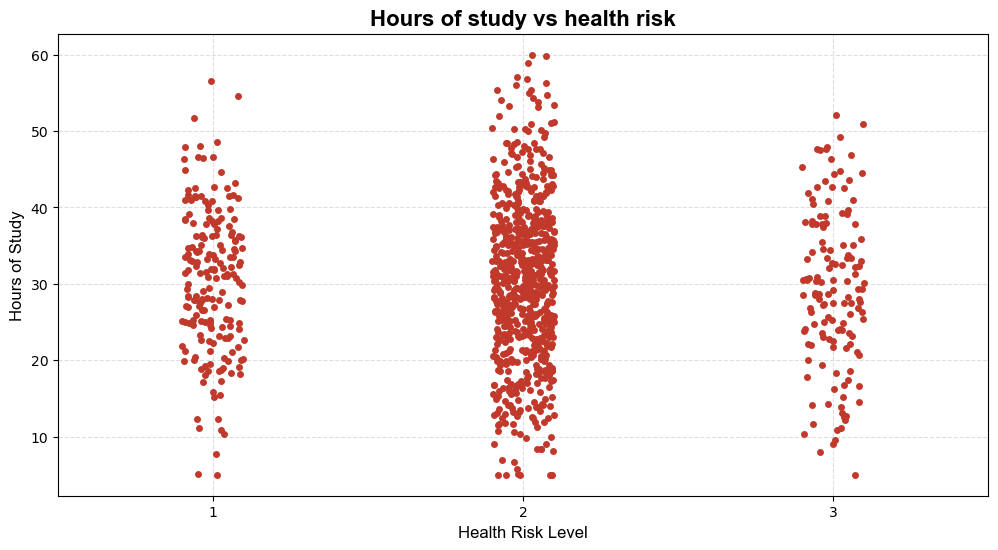

In [11]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=df2, y="Study_Hours", x="Health_Risk_Numeric", color="#c0392b", s=5)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Health Risk Level", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs health risk", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

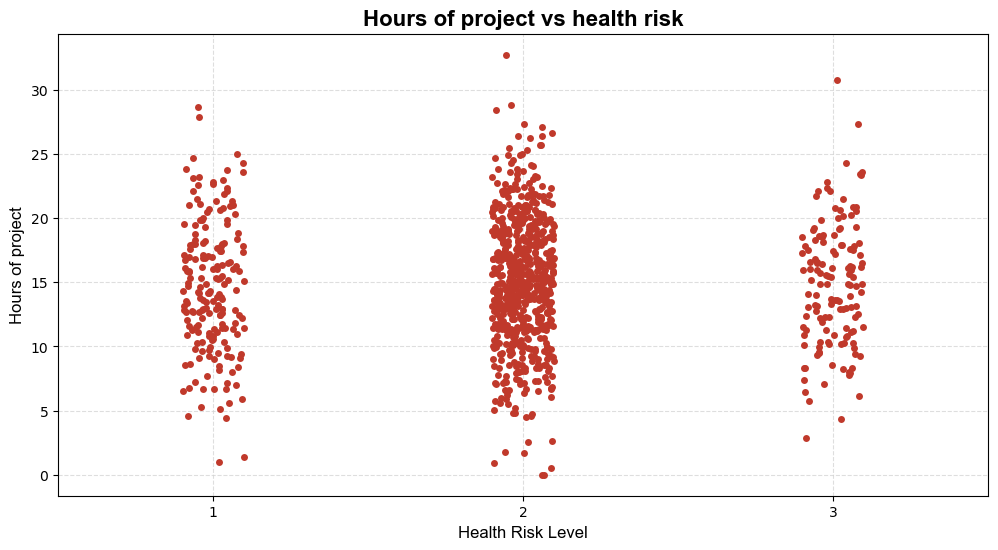

In [12]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=df2, y="Project_Hours", x="Health_Risk_Numeric", color="#c0392b", s=5)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of project", fontfamily="Arial", fontsize=12)
plt.xlabel("Health Risk Level", fontfamily="Arial", fontsize=12)
plt.title("Hours of project vs health risk", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

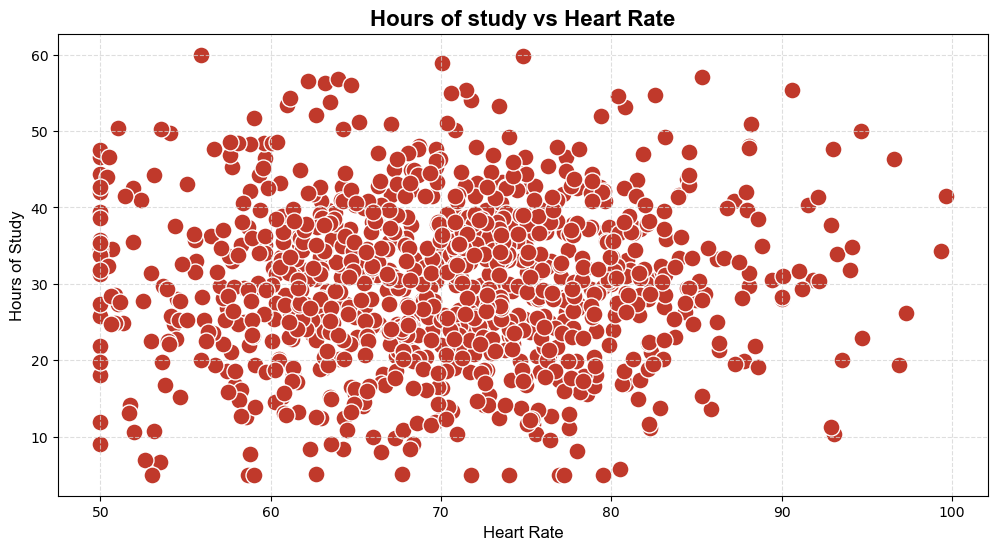

In [16]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, y="Study_Hours", x="Heart_Rate", color="#c0392b", s=150)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Heart Rate", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Heart Rate", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

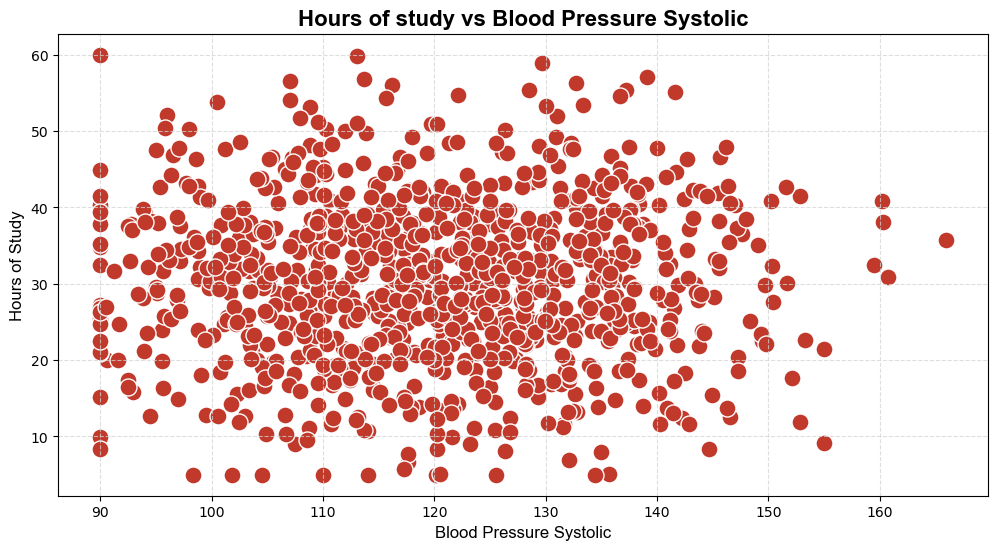

In [15]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, y="Study_Hours", x="Blood_Pressure_Systolic", color="#c0392b", s=150)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Blood Pressure Systolic", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Blood Pressure Systolic", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

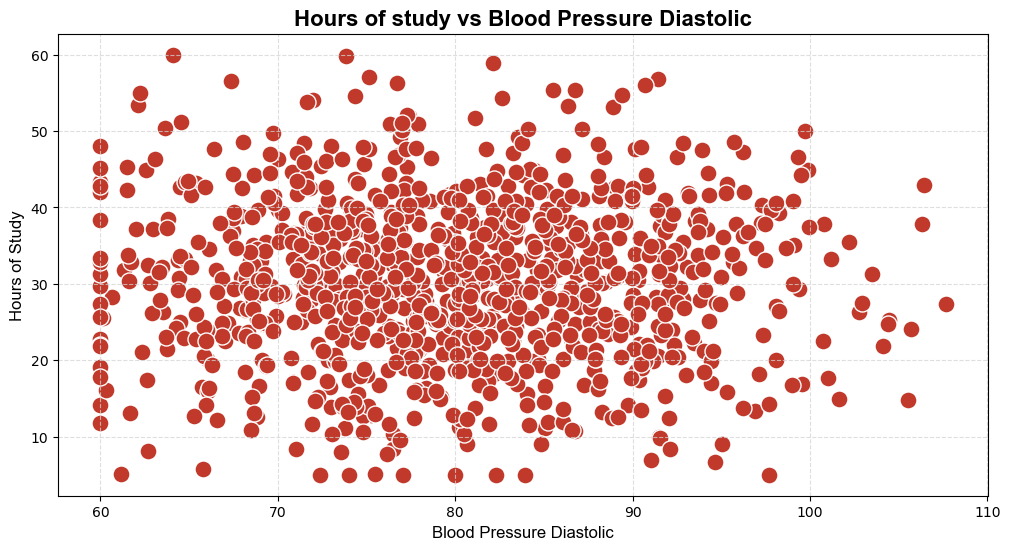

In [12]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, y="Study_Hours", x="Blood_Pressure_Diastolic", color="#c0392b", s=150)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Blood Pressure Diastolic", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Blood Pressure Diastolic", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

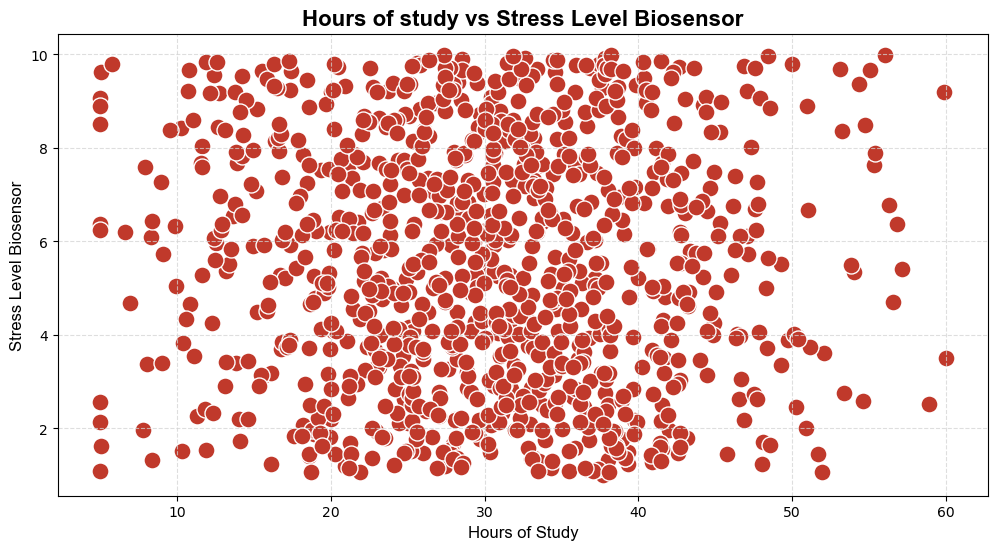

In [13]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, x="Study_Hours", y="Stress_Level_Biosensor", color="#c0392b", s=150)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.ylabel("Stress Level Biosensor", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Stress Level Biosensor", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

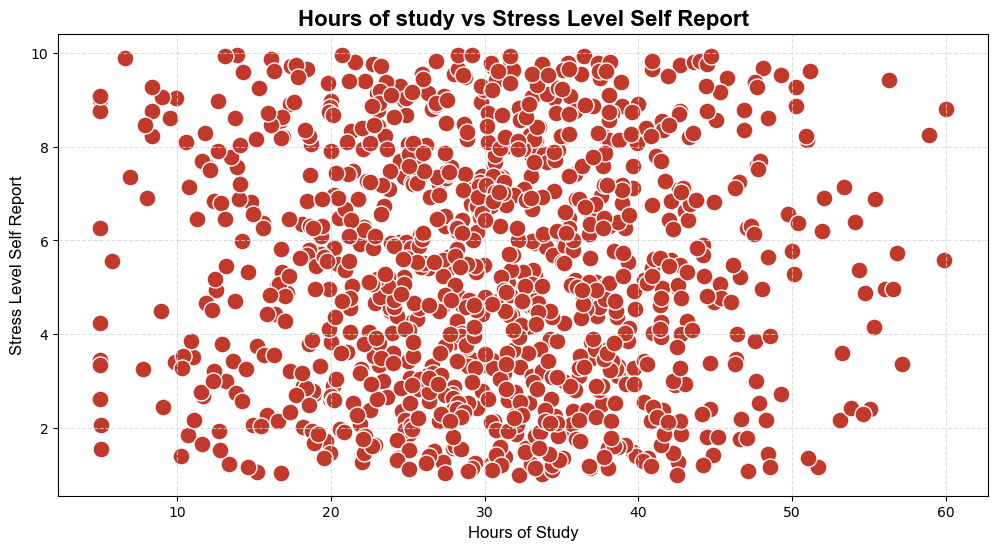

In [14]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, x="Study_Hours", y="Stress_Level_Self_Report", color="#c0392b", s=150)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.ylabel("Stress Level Self Report", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Stress Level Self Report", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

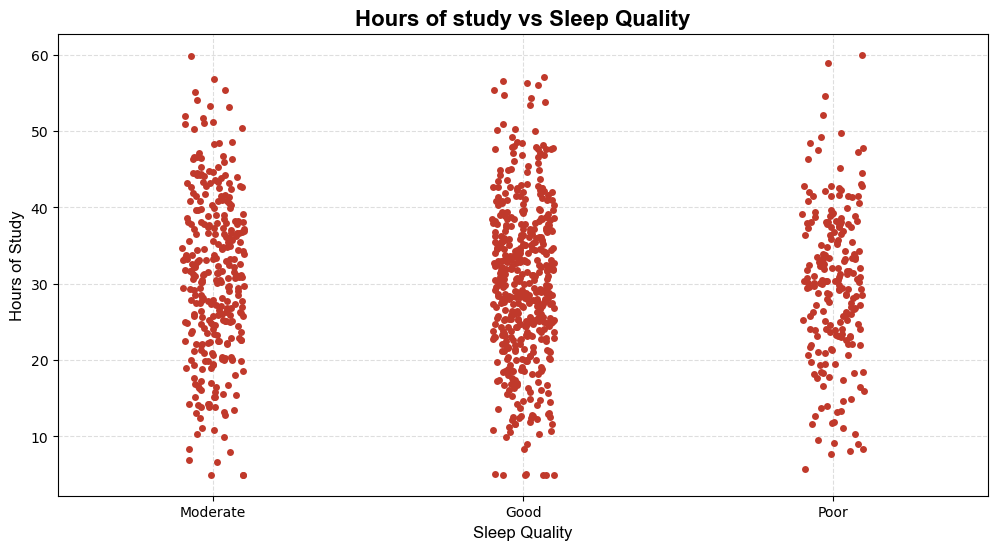

In [31]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=df2, y="Study_Hours", x="Sleep_Quality", color="#c0392b", s=5)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Sleep Quality", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Sleep Quality", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

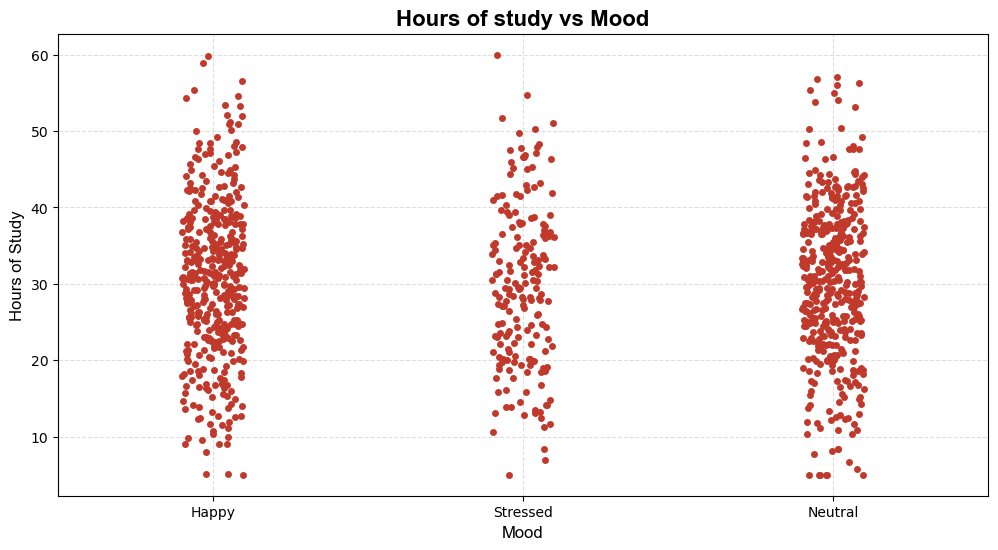

In [29]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=df2, y="Study_Hours", x="Mood", color="#c0392b", s=5)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Mood", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Mood", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

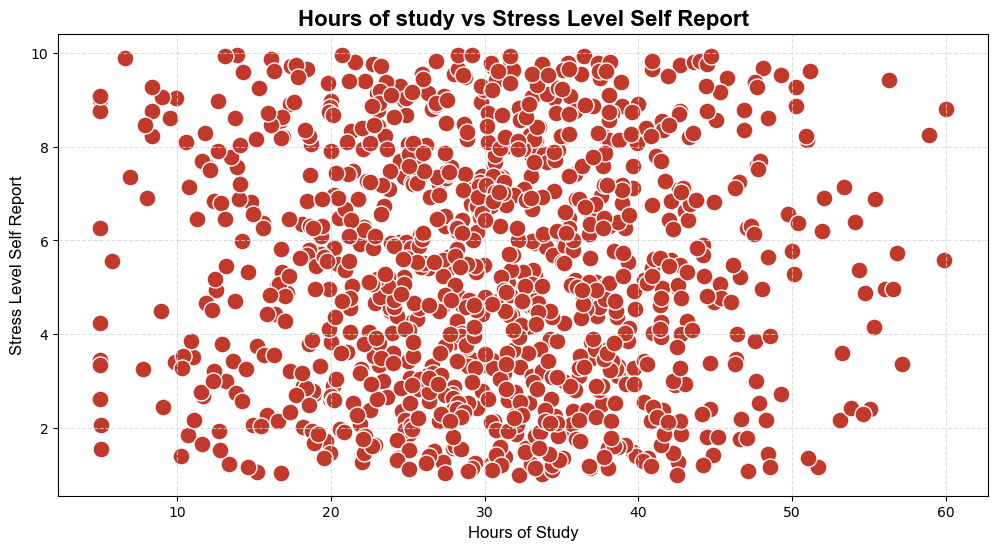

In [17]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, x="Study_Hours", y="Stress_Level_Self_Report", color="#c0392b", s=150)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.ylabel("Stress Level Self Report", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs Stress Level Self Report", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

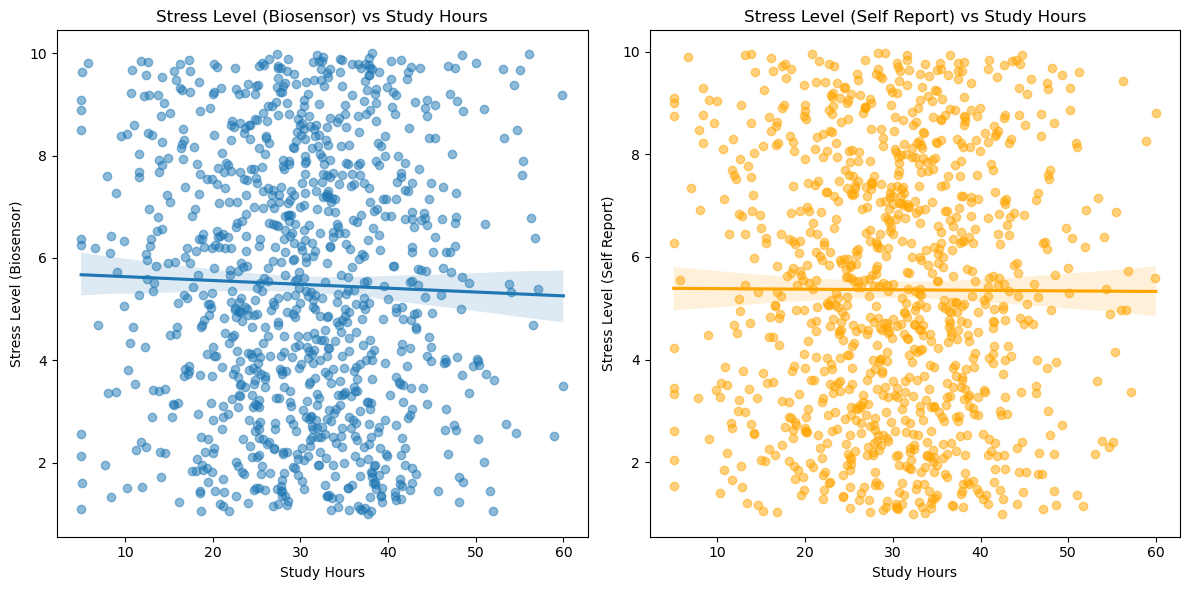

In [48]:
# Create scatter plots for stress levels vs. study hours with regression lines
plt.figure(figsize=(12, 6))

# Stress Level (Biosensor) vs Study Hours
plt.subplot(1, 2, 1)
sns.regplot(x='Study_Hours', y='Stress_Level_Biosensor', data=df2, scatter_kws={'alpha':0.5})
plt.title('Stress Level (Biosensor) vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Stress Level (Biosensor)')

# Stress Level (Self Report) vs Study Hours
plt.subplot(1, 2, 2)
sns.regplot(x='Study_Hours', y='Stress_Level_Self_Report', data=df2, scatter_kws={'alpha':0.5}, color='orange')
plt.title('Stress Level (Self Report) vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Stress Level (Self Report)')

plt.tight_layout()
plt.show()

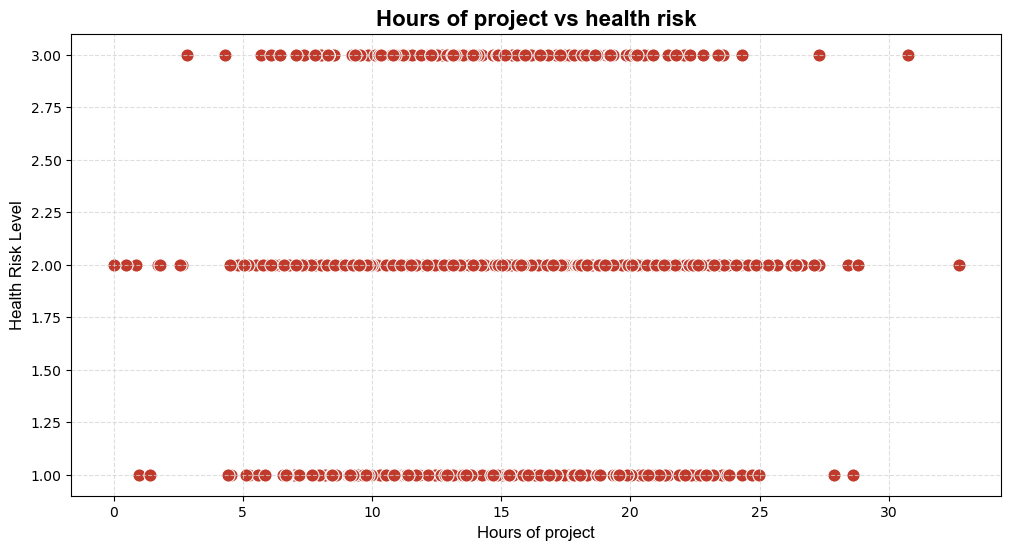

In [18]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.scatterplot(data=df2, x="Project_Hours", y ="Health_Risk_Numeric", color="#c0392b", s=90)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Hours of project", fontfamily="Arial", fontsize=12)
plt.ylabel("Health Risk Level", fontfamily="Arial", fontsize=12)
plt.title("Hours of project vs health risk", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

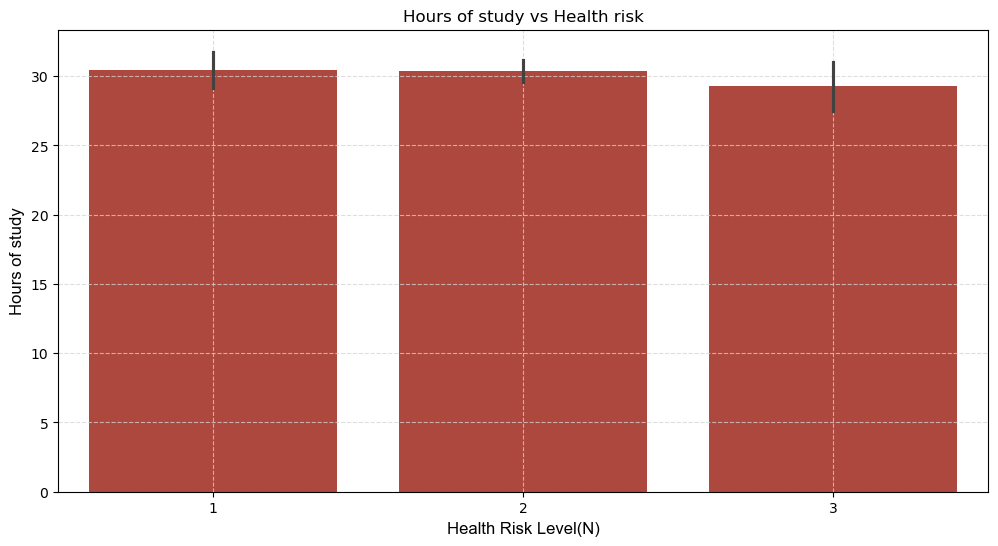

In [25]:

# Change Canvas Size
plt.figure(figsize = (12,6))

# Create a basic plot
sns.barplot(data = df2, y = "Study_Hours", x ="Health_Risk_Numeric", color="#c0392b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.title('Hours of study vs Health risk')
plt.ylabel("Hours of study", fontfamily="Arial", fontsize=12)
plt.xlabel("Health Risk Level(N)", fontfamily="Arial", fontsize=12)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

plt.show()

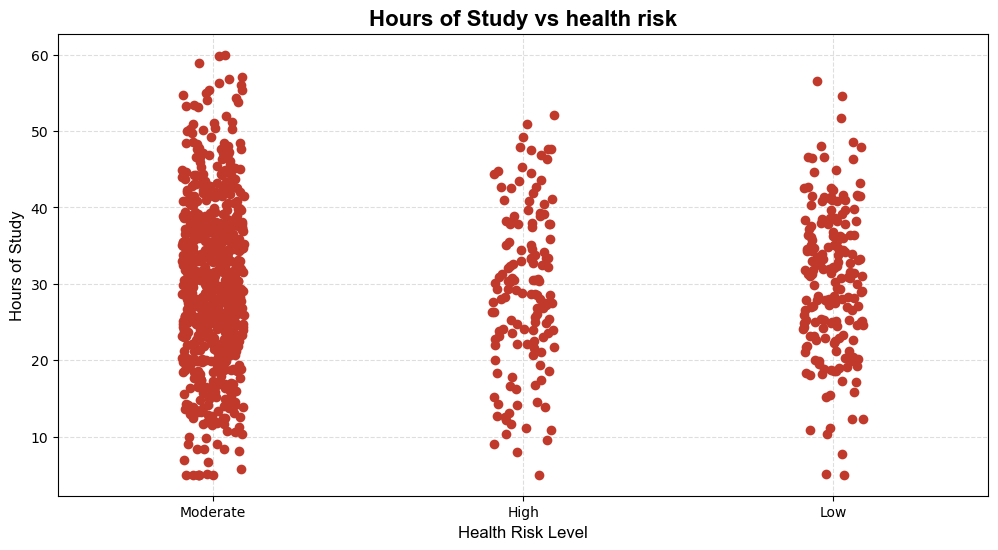

In [20]:

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.stripplot(data=df2, y="Study_Hours", x ="Health_Risk_Level", color="#c0392b", s=7)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.xlabel("Health Risk Level", fontfamily="Arial", fontsize=12)
plt.title("Hours of Study vs health risk", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

<Figure size 1200x600 with 0 Axes>

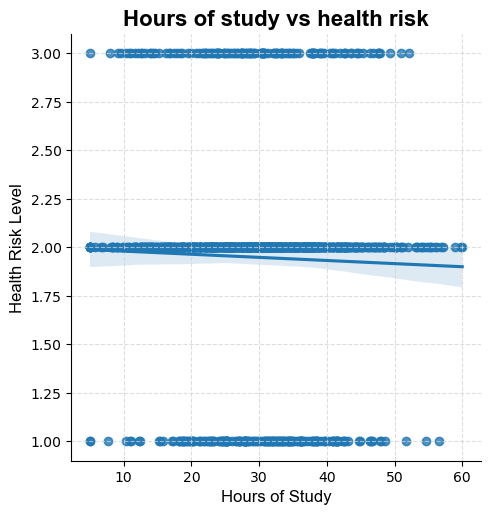

In [21]:
# Determine if there are any potential outliers in the Colour Intensity- right skew a bit

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.lmplot(data=df2, x="Study_Hours", y ="Health_Risk_Numeric", palette="deep")


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Hours of Study", fontfamily="Arial", fontsize=12)
plt.ylabel("Health Risk Level", fontfamily="Arial", fontsize=12)
plt.title("Hours of study vs health risk", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()